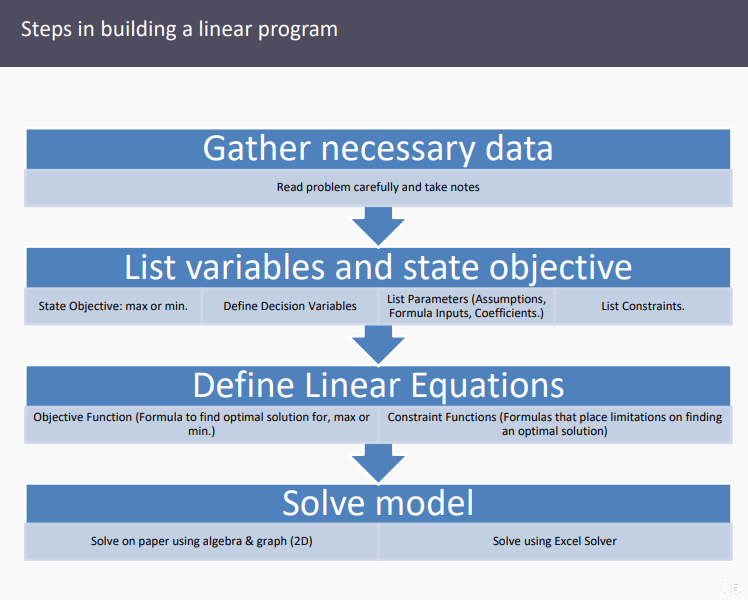
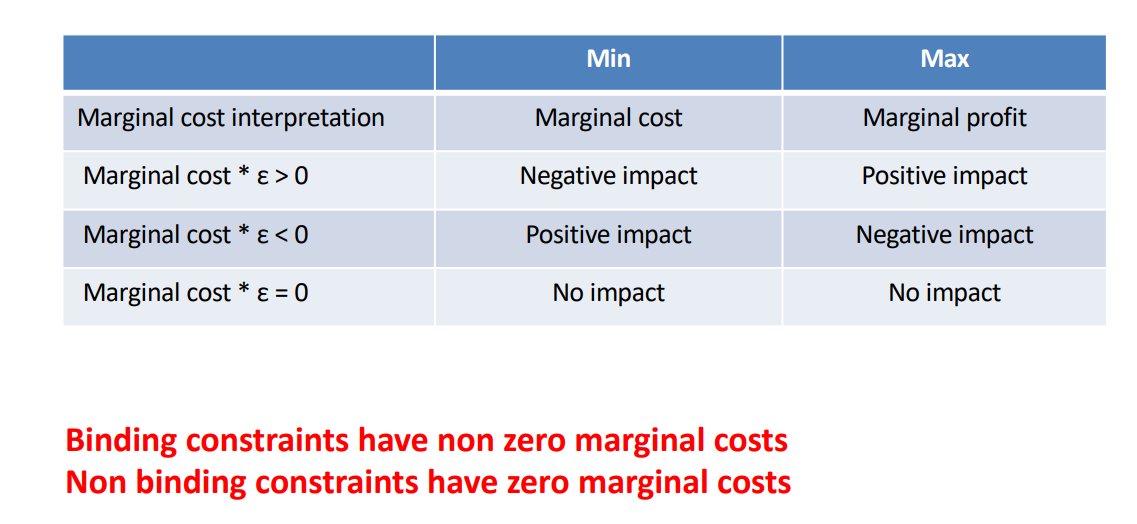
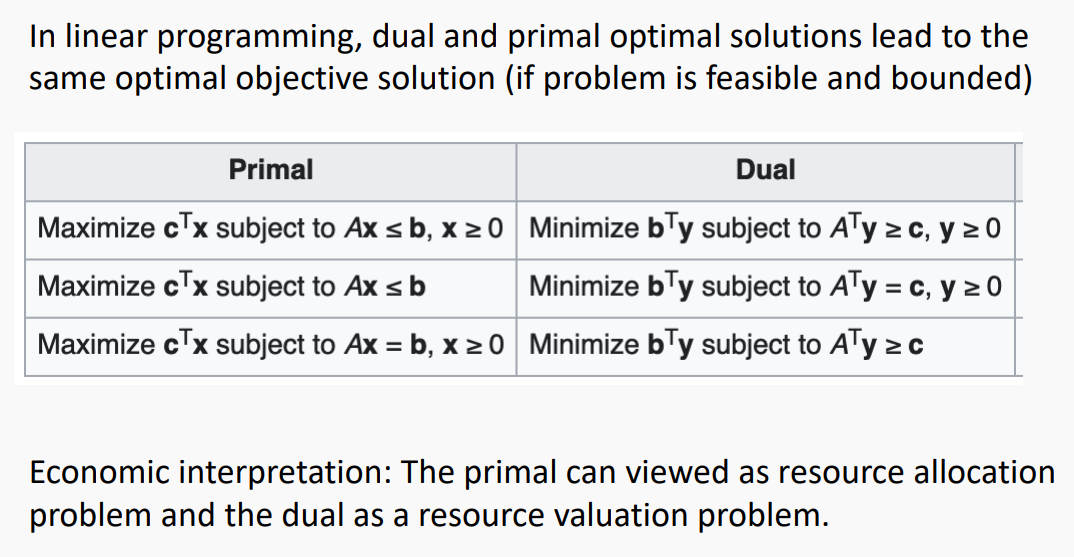

### Maximization

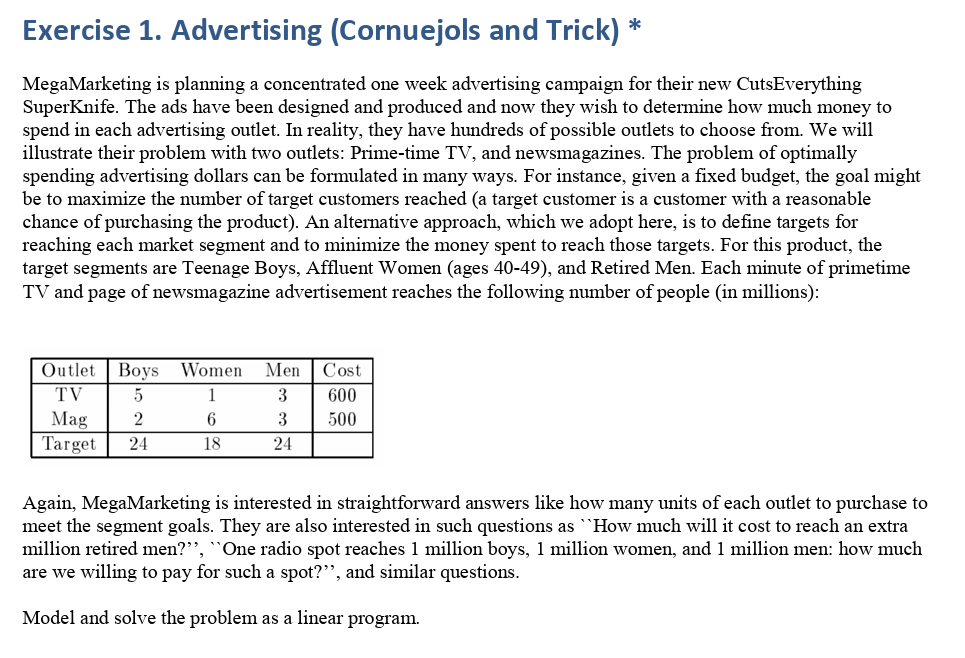

In [30]:
from scipy.optimize import linprog

# Coefficients for the objective function (minimize the cost)
c = [600, 500]  # Cost for TV and Magazine respectively

# Coefficients for the inequality constraints (lhs)
# Note that we need to multiply the target audience numbers by a million to match the units given in the problem
A = [[-5, -2],  # Coefficient for Teenage Boys target
     [-1, -6],  # Coefficient for Affluent Women target
     [-3, -3]]  # Coefficient for Retired Men target

# Right-hand side values for the inequality constraints
b = [-24, -18, -24]  # Negative targets because we are using the 'greater than equals' constraint

# Bounds for each variable
x_bounds = (0, None)  # x (TV advertising minutes) can't be negative
y_bounds = (0, None)  # y (Magazine advertising minutes) can't be negative

# Solve the problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Display the result
result_x = result.x if result.success else [0, 0]
result_x, result.fun if result.success else 0

print("the result is: ",result.fun)

the result is:  4266.666666666667


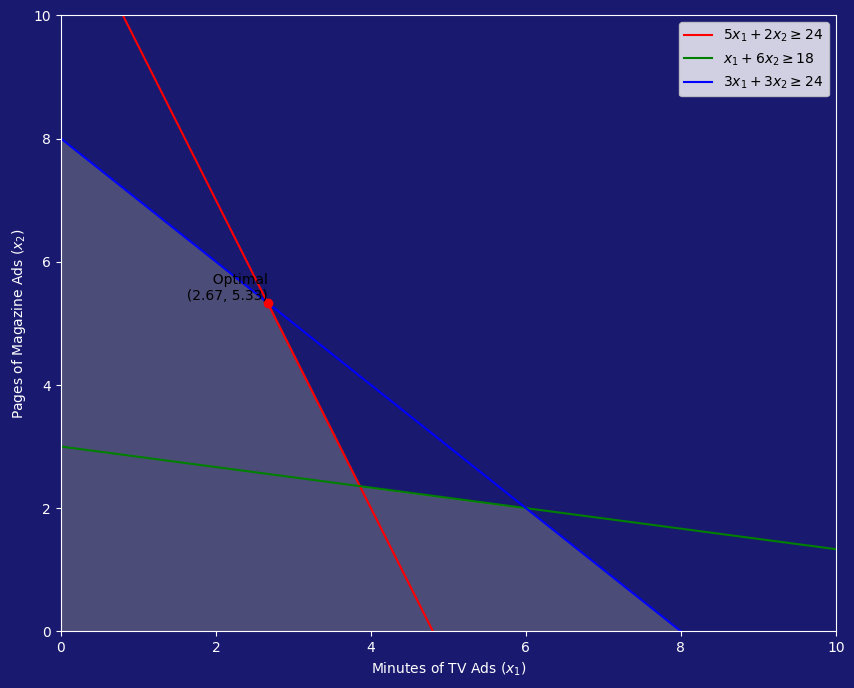

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraint lines for the graph
x = np.linspace(0, 10, 400)  # a range of values for x (minutes of TV ads)

# Constraints
y1 = (24 - 5 * x) / 2   # Teenage Boys target constraint
y2 = (18 - x) / 6       # Affluent Women target constraint
y3 = (24 - 3 * x) / 3   # Retired Men target constraint

# Make plot
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label=r'$5x_1 + 2x_2 \geq 24$', color='red')
plt.plot(x, y2, label=r'$x_1 + 6x_2 \geq 18$', color='green')
plt.plot(x, y3, label=r'$3x_1 + 3x_2 \geq 24$', color='blue')

# Highlight the feasible region
y_max = np.minimum(np.maximum(y1, y2), y3)
plt.fill_between(x, 0, y_max, where=(y_max>=0), color='grey', alpha=0.5)

# Highlight the optimal point
plt.plot(result_x[0], result_x[1], 'ro')  # optimal point
plt.text(result_x[0], result_x[1], f'  Optimal\n  ({result_x[0]:.2f}, {result_x[1]:.2f})', verticalalignment='bottom', horizontalalignment='right')

# Set limits and labels
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Minutes of TV Ads ($x_1$)')
plt.ylabel('Pages of Magazine Ads ($x_2$)')

# Add a legend
plt.legend()

# Set a midnight blue background
ax = plt.gca()
ax.set_facecolor('midnightblue')
ax.figure.set_facecolor('midnightblue')

# Change the colors of the axes and labels to white
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Show the plot
plt.show()


### Maximization
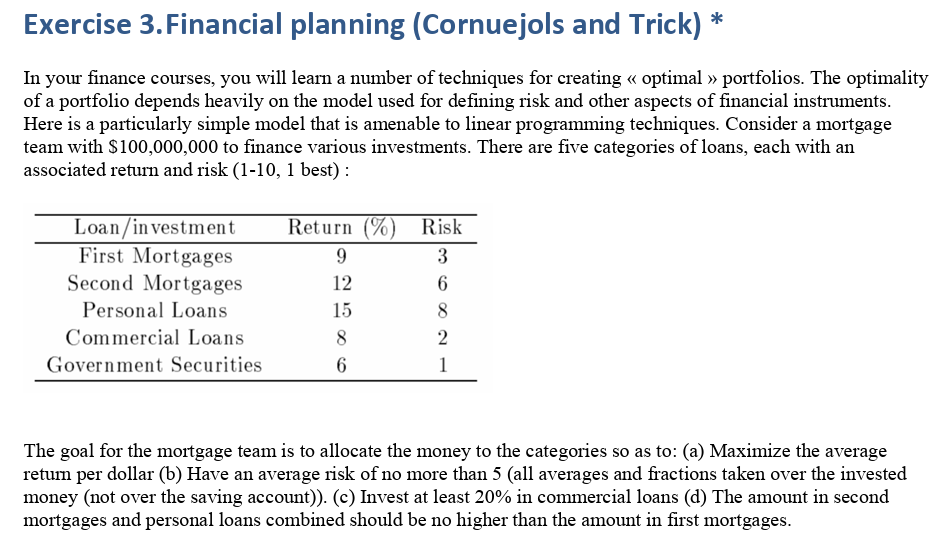

### Maximization and sensitive analysis
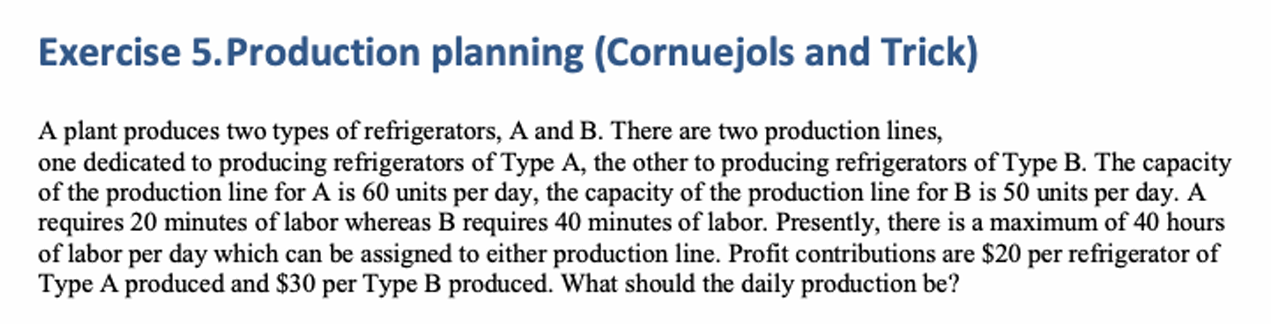

In [1]:
from scipy.optimize import linprog

# Coefficients for the objective function (we want to maximize profits, so we need to pass the negative values)
c = [-20, -30]  # Maximize the profit, hence negative for the linprog function

# Coefficients for the inequality constraints (lhs)
A = [[1, 0],  # Coefficient for A production constraint
     [0, 1],  # Coefficient for B production constraint
     [20, 40],] # Coefficient for labor constraint

# Right-hand side values for the inequality constraints
b = [60, 50, 2400]  # Capacity constraints for A, B and available labor in minutes

# Bounds for each variable
x0_bounds = (0, None)  # A can't be negative
x1_bounds = (0, None)  # B can't be negative

# Solve the problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds], method='highs')

# Display the result
result_x = result.x if result.success else [0, 0]
result_x, result.fun if result.success else 0

print("the result is: ",-result.fun)



the result is:  2100.0


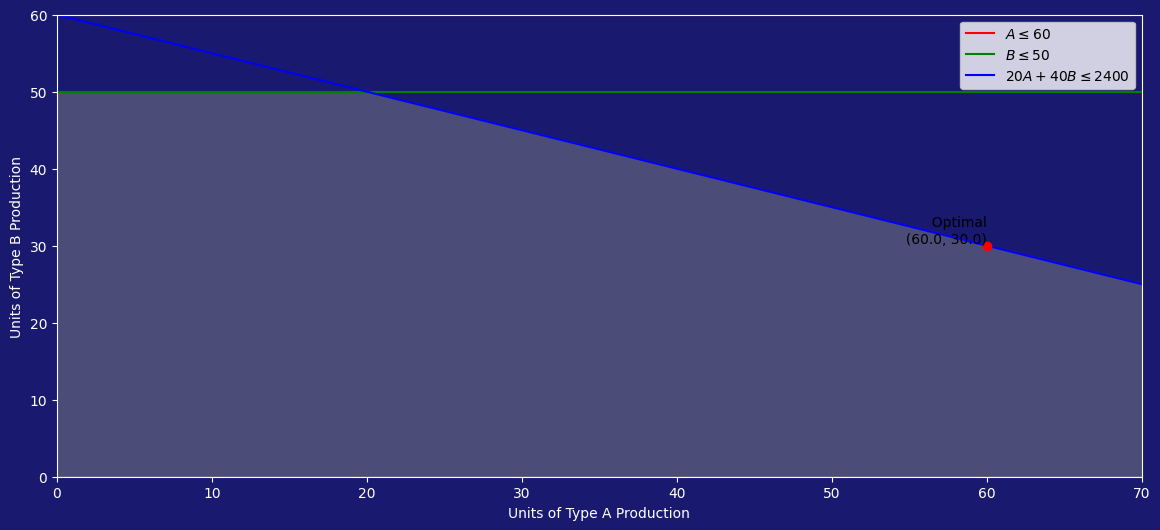

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constraint lines
x = np.linspace(0, 100, 400)  # a range of values for x (Type A production)

# Constraints
y1 = 60 * np.ones_like(x)  # Production capacity for Type A
y2 = 50 * np.ones_like(x)  # Production capacity for Type B
y3 = (2400 - 20 * x) / 40  # Labor constraint

# Make plot
plt.figure(figsize=(14, 6))
plt.plot(x, y1, label=r'$A \leq 60$', color='red')
plt.plot(x, y2, label=r'$B \leq 50$', color='green')
plt.plot(x, y3, label=r'$20A + 40B \leq 2400$', color='blue')

# Fill the feasible region
plt.fill_between(x, np.minimum(y1, np.minimum(y2, y3)), color='grey', alpha=0.5)

# Highlight the optimal point
plt.plot(result_x[0], result_x[1], 'ro')  # optimal point
plt.text(result_x[0], result_x[1], f'  Optimal\n  ({result_x[0]}, {result_x[1]})', verticalalignment='bottom', horizontalalignment='right')

# Set limits and labels
plt.xlim(0, 70)
plt.ylim(0, 60)
plt.xlabel('Units of Type A Production')
plt.ylabel('Units of Type B Production')

# Add a legend
plt.legend()

# Set a dark blue background
ax = plt.gca()
ax.set_facecolor('midnightblue')
ax.figure.set_facecolor('midnightblue')

# Change the colors of the axes and labels to white
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Show the plot
plt.show()

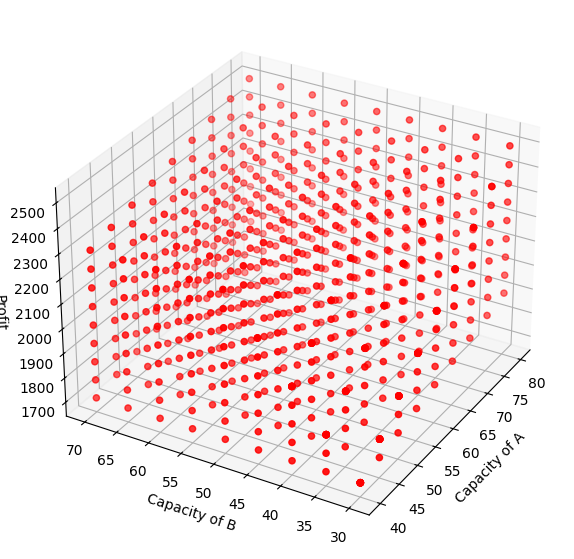

(array([60., 30.]), 2100.0)

In [3]:
# Extract the result if successful, otherwise set to zero
result_x = result.x if result.success else [0, 0]
profit = -result.fun if result.success else 0

from scipy.optimize import linprog
import matplotlib.pyplot as plt
import numpy as np

# Sensitivity Analysis
# Let's vary the production capacity of A from 40 to 80 and B from 30 to 70
# Also vary the available labor from 2000 to 2800 minutes
# Collecting the results in a list
sensitivity_results = []
for a_capacity in range(40, 81, 5):
    for b_capacity in range(30, 71, 5):
        for labor_available in range(2000, 2801, 100):
            b_temp = [a_capacity, b_capacity, labor_available]
            result_temp = linprog(c, A_ub=A, b_ub=b_temp, bounds=[x0_bounds, x1_bounds], method='highs')
            if result_temp.success:
                sensitivity_results.append((-result_temp.fun, a_capacity, b_capacity, labor_available))

# Plotting the results
# Let's create a 3D plot with production capacity of A and B on the x and y axes and profit on the z axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Unpacking the results for plotting
profits, a_capacities, b_capacities, labor_availabilities = zip(*sensitivity_results)

# Scatter plot for the sensitivity analysis results
ax.scatter(a_capacities, b_capacities, profits, c='r', marker='o')

ax.set_xlabel('Capacity of A')
ax.set_ylabel('Capacity of B')
ax.set_zlabel('Profit')

# Setting the angle of the plot for better visualization
ax.view_init(elev=30., azim=210)

plt.show()

(result_x, profit)

In [6]:
# Original constraints
original_b = [60, 50, 2400]

# Adjusted constraints for sensitivity analysis
adjusted_bs = [
    [61, 50, 2400],  # Increase capacity for A
    [60, 51, 2400],  # Increase capacity for B
    [60, 50, 2401],  # Increase available labor
    [59, 50, 2400],  # Decrease capacity for A
    [60, 49, 2400],  # Decrease capacity for B
    [60, 50, 2399]   # Decrease available labor
]

# Solve the problem for each adjusted constraint set
adjusted_results = []
for adjusted_b in adjusted_bs:
    adjusted_result = linprog(c, A_ub=A, b_ub=adjusted_b, bounds=[x0_bounds, x1_bounds], method='highs')
    adjusted_profit = -adjusted_result.fun if adjusted_result.success else 0
    adjusted_results.append((adjusted_result.x if adjusted_result.success else [0, 0], adjusted_profit))

adjusted_results

import pandas as pd

# Create a DataFrame to display the results in a table
adjusted_constraints = [
    "Increase capacity for A",
    "Increase capacity for B",
    "Increase available labor",
    "Decrease capacity for A",
    "Decrease capacity for B",
    "Decrease available labor"
]

df_results = pd.DataFrame({
    "Adjustment": adjusted_constraints,
    "Production of A": [result[0][0] for result in adjusted_results],
    "Production of B": [result[0][1] for result in adjusted_results],
    "Total Profit ($)": [result[1] for result in adjusted_results]
})

df_results


,Adjustment,Production of A,Production of B,Total Profit ($)
0,Increase capacity for A,61.0,29.500,2105.00
1,Increase capacity for B,60.0,30.000,2100.00
2,Increase available labor,60.0,30.025,2100.75
3,Decrease capacity for A,59.0,30.500,2095.00
4,Decrease capacity for B,60.0,30.000,2100.00
5,Decrease available labor,60.0,29.975,2099.25


In [12]:
# Calculate shadow prices based on the adjustments made
# Original total profit
original_profit = 2100.00

# Changes in constraints and their corresponding profits
changes_in_constraints = {
    "Shadow Capacity for A": [1, 2105.00],  # Increase capacity for A by 1
    "Shadow Capacity for B": [1, 2100.00],  # Increase capacity for B by 1 (no change in profit)
    "Shadow Available Labor": [1, 2100.75]  # Increase available labor by 1 minute
}

# Calculate shadow prices
shadow_prices = {}
for constraint, change in changes_in_constraints.items():
    delta_constraint = change[0]
    new_profit = change[1]
    shadow_price = (new_profit - original_profit) / delta_constraint
    shadow_prices[constraint] = shadow_price

shadow_prices

{'Shadow Capacity for A': 5.0,
 'Shadow Capacity for B': 0.0,
 'Shadow Available Labor': 0.75}

In [1]:
from scipy.optimize import linprog
import pandas as pd
import numpy as np

# Create a 1D array
arr = np.array([1, 2, 3, 4, 5])

# Convert the array to a Pandas DataFrame
df = pd.DataFrame(arr)

# Coefficients for the objective function (to be maximized, hence negative for the linprog function)
c = [-9, -12, -15, -8, -6]  # Total return, we want to maximize it so we use negative coefficients

# Coefficients for the equality constraint (total amount invested)
A_eq = [[1, 1, 1, 1, 1]]  # Coefficient for total amount invested constraint
b_eq = [100000000]  # Total amount available for investment
mortage = 1000000000

# Coefficients for the inequality constraints (lhs)
A_ub = [
    [3, 6, 8, 2, 1],  # Coefficients for average risk constraint
    [-0.2, -0.2, -0.2, 0.8, -0.2]  # Coefficients for at least 20% in commercial loans constraint
]
b_ub = [
    5 * 100000000,  # 5 times the total amount invested for average risk
    0  # This will be adjusted in the bounds, as it's relative to the total amount invested
]

# Additional inequality constraint for second mortgages and personal loans not exceeding first mortgages
A_ub.append([-1, 1, 1, 0, 0])
b_ub.append(0)

# Bounds for each variable (investment amounts can't be negative)
bounds = [(0, None), (0, None), (0, None), (0, None), (0, None)]

# Solve the problem
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Display the result
result_x = result.x if result.success else [0, 0, 0, 0, 0]
result_x, -result.fun if result.success else 0  # Negate the result.fun to get the actual total return

print("the result is: ",-result.fun)
print("Total returns: ",-result.fun - mortage)

result1 = np.array(result.x)
result1 = pd.DataFrame(result1, columns=['Loan Investment'])
result1
 

the result is:  1142857142.857143
Total returns:  142857142.85714293


,Loan Investment
0,4.285714e+07
1,0.000000e+00
2,4.285714e+07
3,1.428571e+07
4,0.000000e+00


### Minimization

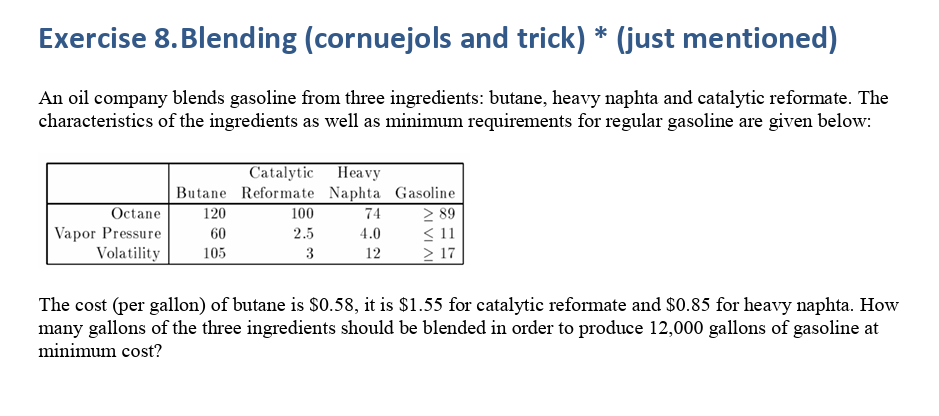

In [4]:
from scipy.optimize import linprog


# Coefficients of the objective function (Cost)
c = [0.58, 1.55, 0.85]

# Coefficients for the inequality constraints (Ax <= b)
# We need to rearrange the constraints to the form of Ax <= b
# For octane number, we move everything to the left and flip the sign
# For vapor pressure, it's already in the correct form
# For volatility, we move everything to the left
A = [
    [-120 + 89, -100 + 89, -74 + 89],  # Octane number constraint
    [60 - 11, 2.5 - 11, 4.0 - 11],     # Vapor pressure constraint
    [-105 + 17, -3 + 17, -12 + 17]     # Volatility constraint
]
b = [0, 0, 0]

# Coefficients for the equality constraint (Ax = b)
A_eq = [[1, 1, 1]]  # Sum of all ingredients must equal 12,000 gallons
b_eq = [12000]      # Total quantity of gasoline to be produced

# Bounds for each variable (non-negativity constraints)
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
bounds = [x0_bounds, x1_bounds, x2_bounds]

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')


print("the result is: ",result.fun)
result

the result is:  12618.767213114754


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 12618.767213114754
              x: [ 1.609e+03  4.076e+03  6.315e+03]
            nit: 2
          lower:  residual: [ 1.609e+03  4.076e+03  6.315e+03]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [ 1.052e+00]
        ineqlin:  residual: [ 0.000e+00  0.000e+00  5.297e+04]
                 marginals: [-2.544e-02 -2.572e-02 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

### Minimize the total cost, which is the sum of production costs and shipping costs.

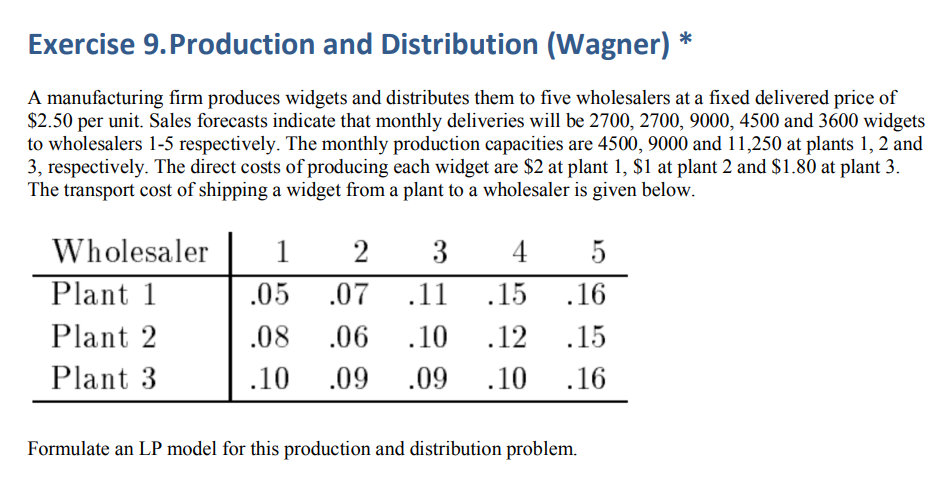

In [35]:
from scipy.optimize import linprog
import pandas as pd
import numpy as np

# Define the coefficients of the objective function
# Objective function: Minimize cost = production_cost + transport_cost
# Production costs for each plant
production_costs = [2, 1, 1.8]

# Transport costs from plants to wholesalers
transport_costs = [
    [0.05, 0.07, 0.11, 0.15, 0.16],
    [0.08, 0.06, 0.10, 0.12, 0.15],
    [0.10, 0.09, 0.09, 0.10, 0.16]
]

# Combine production and transport costs into a single coefficient matrix
C = [production_costs[i] + transport_costs[i][j] for i in range(3) for j in range(5)]

# Define the inequality constraints matrix (supply constraints)
# Each plant can supply a maximum of its production capacity
A_supply = [
    [1 if j // 5 == i else 0 for j in range(15)]
    for i in range(3)
]

# Define the inequality constraints vector (supply constraints)
b_supply = [4500, 9000, 11250]

# Define the equality constraints matrix (demand constraints)
# Each wholesaler must receive exactly its forecasted demand
A_demand = [
    [1 if j % 5 == i else 0 for j in range(15)]
    for i in range(5)
]

# Define the equality constraints vector (demand constraints)
b_demand = [2700, 2700, 9000, 4500, 3600]

# Define the bounds for each decision variable (non-negativity constraints)
x_bounds = [(0, None) for _ in range(15)]

# Combine the supply and demand constraints
A_eq = A_demand
b_eq = b_demand
A_ub = A_supply
b_ub = b_supply

# Solve the linear programming problem
result = linprog(C, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

result_x = result.x if result.success else None
result_x, result.fun if result.success else None, result.success
print("the result is for cost minimization: ",result.fun, " of costs")

result1 = np.array(result.x)
result1 = pd.DataFrame(result1, columns=['Production per fabrict'])
result1




the result is for cost minimization:  35883.0  of costs


,Production per fabrict
0,2250.0
1,0.0
2,0.0
3,0.0
4,0.0
5,450.0
6,2700.0
7,2250.0
8,0.0
9,3600.0


In [36]:
""" Orient the solution to income - cost (Maximization)"""

# Objective function: Maximize revenue - cost = selling_price - (production_cost + transport_cost)
# Selling price is fixed at $2.50 per unit
selling_price = 2.50

# Calculate the net profit for shipping one widget from each plant to each wholesaler
# Since linprog minimizes, we use the negative profit to turn the maximization problem into a minimization problem
profit_per_widget = [selling_price - (production_costs[i] + transport_costs[i][j]) for i in range(3) for j in range(5)]
C_revenue = [-p for p in profit_per_widget]

# Solve the linear programming problem for maximizing profit
result_revenue = linprog(C_revenue, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

result_revenue_x = result_revenue.x if result_revenue.success else None
result_revenue_x, -result_revenue.fun if result_revenue.success else None, result_revenue.success
print("the result for profit maximization is: ",-result_revenue.fun, " of profit")

result2 = np.array(result_revenue.x)
result2 = pd.DataFrame(result2, columns=['Production per fabrict'])
result2


the result for profit maximization is:  20367.0  of profit


,Production per fabrict
0,2250.0
1,0.0
2,0.0
3,0.0
4,0.0
5,450.0
6,2700.0
7,2250.0
8,0.0
9,3600.0


### Workforce planning

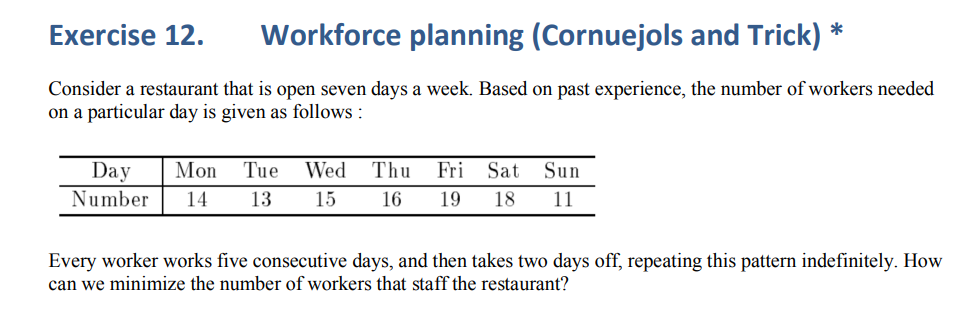

In [1]:
#pip install pulp
from pulp import LpProblem, LpVariable, lpSum, LpMinimize

# Days of the week
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Number of workers needed on each day
demand = {'Mon': 14, 'Tue': 13, 'Wed': 15, 'Thu': 16, 'Fri': 19, 'Sat': 18, 'Sun': 11}

# Create the LP problem
prob = LpProblem("Workforce_Planning", LpMinimize)

# Decision variables
workers = LpVariable.dicts("Workers", days, lowBound=0, cat='Integer')

# Objective function
prob += lpSum(workers), "Total Workers"

# Constraints
for i in range(len(days)):
    # Workers working on consecutive days
    prob += workers[days[i]] + workers[days[(i + 1) % 7]] + workers[days[(i + 2) % 7]] + \
            workers[days[(i + 3) % 7]] + workers[days[(i + 4) % 7]] >= demand[days[i]]

# Solve the problem
prob.solve()

# Display the results
print("Status:", prob.status)
print("Optimal Number of Workers:")
for day in days:
    print(f"{day}: {workers[day].varValue}")
print("Total Workers Needed:", round(prob.objective.value()))



Status: 1
Optimal Number of Workers:
Mon: 7.0
Tue: 0.0
Wed: 3.0
Thu: 0.0
Fri: 4.0
Sat: 6.0
Sun: 2.0
Total Workers Needed: 22


### Stylish

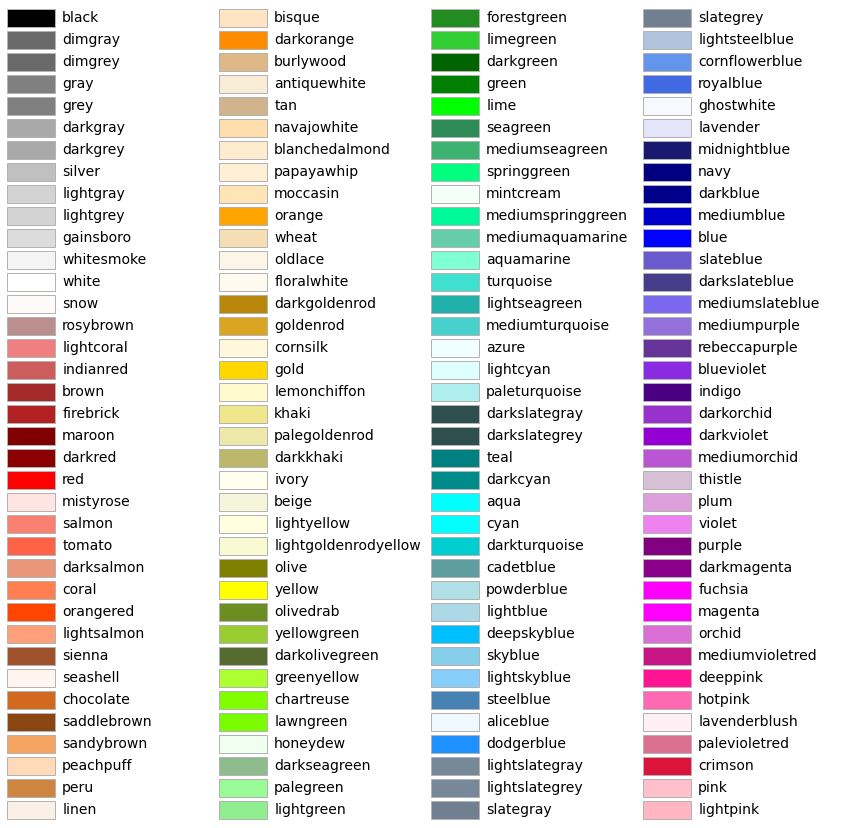

In [3]:
"""Stylish for graphs"""

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import math 

def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.CSS4_COLORS)
plt.show()